In [21]:
# ! pip uninstall AIEM -y

Found existing installation: AIEM 2024.8
Uninstalling AIEM-2024.8:
  Successfully uninstalled AIEM-2024.8


In [2]:
! pip install git+https://github.com/Morteza-Khazaei/AIEM.git

  Cloning https://github.com/Morteza-Khazaei/AIEM.git to /tmp/pip-req-build-jqi37tx2
  Running command git clone --filter=blob:none --quiet https://github.com/Morteza-Khazaei/AIEM.git /tmp/pip-req-build-jqi37tx2
  Resolved https://github.com/Morteza-Khazaei/AIEM.git to commit 17b1fa4c84aef467b66cba0d5544bfe7cbc5097a
  Preparing metadata (setup.py) ... done
  Created wheel for AIEM: filename=AIEM-2024.8-py3-none-any.whl size=7103 sha256=f45af137ec376ab7f9cb6771bf8481ce7770e1d373f8929978458d9208c272a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnbfm52c/wheels/45/9a/b3/c75f20518fc5afdbfb17d3c126bfc2384c79eca4e01d9232e2
Successfully built AIEM


In [20]:
from aiem import AIEM
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

freq:  5.405
phi_i:  0.0
phi_s:  179.9999
sigma:  0.00354
cl:  0.0178
eps:  [12.+1.8j]


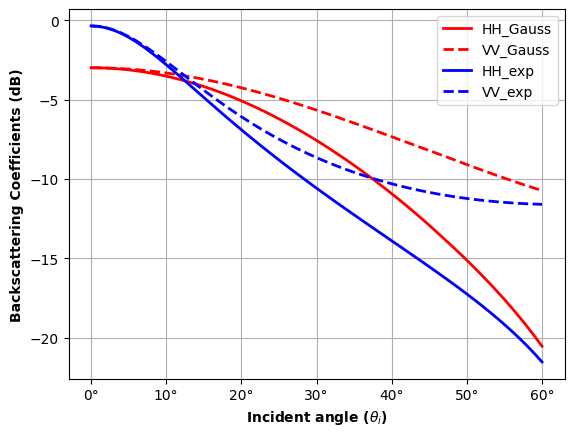

In [57]:
frq = 5.405
print('freq: ', frq)
itype = ['1', '2']
theta_i = np.arange(0.00001, 61, 1)
# print('theta: ', theta)
phi_i = 0.0
print('phi_i: ', phi_i)
phi_s = 179.9999
print('phi_s: ', phi_s)
sigma = 0.00354
print('sigma: ', sigma)
cl = 0.0178
print('cl: ', cl)
err = 12
eri = 1.8
eps = np.array([err+eri*1j,], dtype=complex)
print('eps: ', eps)

# Initialize defaultdicts to store the results
HH = defaultdict(list)
VV = defaultdict(list)
HV = defaultdict(list)
VH = defaultdict(list)

# Loop over itype and theta_i values
for n in itype:
    for i in theta_i:
        aiem = AIEM(frq_ghz=frq, theta_i=i, theta_s=i, phi_i=phi_i, phi_s=phi_s, sigma=sigma, cl=cl, eps=eps, itype=n)
        sigHH, sigVH, sigHV, sigVV = aiem.run()
        HH[n].append(sigHH)
        VV[n].append(sigVV)
        HV[n].append(sigHV)
        VH[n].append(sigVH)

# # Plotting results
# plt.figure(1)

# # Plotting HH and VV for each itype
plt.plot(theta_i, HH['1'], color='r', linewidth=2, label='HH_Gauss')
plt.plot(theta_i, VV['1'], color='r', linewidth=2, linestyle='--', label='VV_Gauss')
plt.plot(theta_i, HH['2'], color='b', linewidth=2, label='HH_exp')
plt.plot(theta_i, VV['2'], color='b', linestyle='--', linewidth=2, label='VV_exp')

# Customizing plot appearance
plt.grid(True)

plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=10, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=10, fontweight='bold')
plt.legend(fontsize=10)
plt.show()